In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis =1)
y = df['target']

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.20, random_state=3)

# Models

## 1) GaussianNB

In [4]:
from sklearn.naive_bayes import GaussianNB 

NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)


GaussianNB()

## 2) Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier 

forest_classifier = RandomForestClassifier()
forest_classifier.fit(x_train, y_train)


RandomForestClassifier()

## 3) Gradient Boosting Classifier

In [6]:
from sklearn.ensemble import GradientBoostingClassifier 

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_train, y_train)


GradientBoostingClassifier()

### Accuracy

In [7]:
NB_classifier.score(x_test, y_test)

0.8067226890756303

In [8]:
forest_classifier.score(x_test, y_test)

0.9117647058823529

In [9]:
gradient_boosting_model.score(x_test, y_test)

0.8907563025210085

# Scale sensative models

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## 4) Logistics Regression

In [11]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train_scaled, y_train)

LogisticRegression()

## 5) Kneighbors Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KN_classifier = KNeighborsClassifier()
KN_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

### Accuracy

In [13]:
LR_classifier.score(x_test_scaled, y_test)

0.7857142857142857

In [14]:
KN_classifier.score(x_test_scaled, y_test)

0.8529411764705882

# Recall Score

In [15]:
from sklearn.metrics import recall_score

y_predictions = NB_classifier.predict(x_test)
y_predictions = recall_score(y_test, y_predictions)
print(f'Recall score for GaussianNB : {y_predictions}')

y_predictions = forest_classifier.predict(x_test)
y_predictions = recall_score(y_test, y_predictions)
print(f'Recall score for RandomForestClassifier : {y_predictions}')

y_predictions = gradient_boosting_model.predict(x_test)
y_predictions = recall_score(y_test, y_predictions)
print(f'Recall score for GradientBoostingClassifier : {y_predictions}')

y_predictions = LR_classifier.predict(x_test)
y_predictions = recall_score(y_test, y_predictions)
print(f'Recall score for LogisticsRegression : {y_predictions}')

y_predictions = KN_classifier.predict(x_test)
y_predictions = recall_score(y_test, y_predictions)
print(f'Recall score for KNeighboursClassifier : {y_predictions}')

Recall score for GaussianNB : 0.746031746031746
Recall score for RandomForestClassifier : 0.873015873015873
Recall score for GradientBoostingClassifier : 0.8492063492063492
Recall score for LogisticsRegression : 0.03968253968253968
Recall score for KNeighboursClassifier : 0.8888888888888888


c:\Users\av\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\av\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


###  "RandomForestClassifier" so far has performed the best in accuracy and recall score.

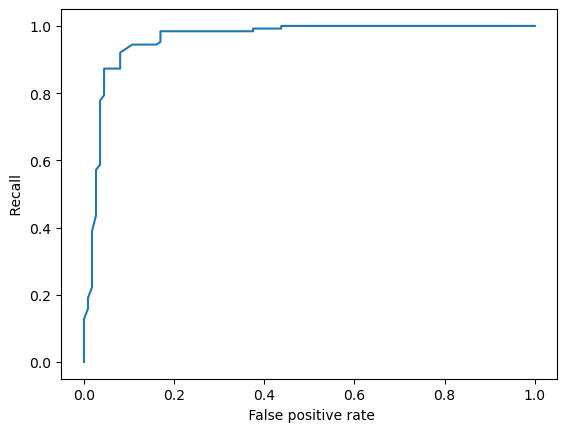

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probablity = forest_classifier.predict_proba(x_test)[:, 1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probablity)
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel(' Recall ')
plt.xlabel(' False positive rate')
plt.show()

In [17]:
roc_auc_score(y_test, y_probablity)

0.9608134920634921

## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

paramGrid = {
    'n_estimators' : [100, 200, 300, 400, 500], 
    'max_features' : ["sqrt", 'log2'],
    'max_depth' : [6, 10,20 ,30],
    'min_samples_split' : [2, 5, 10],
}

forest = RandomForestClassifier(n_jobs=-1, random_state=3)

gridSearch = GridSearchCV(forest, paramGrid, cv=3, n_jobs=-1)

gridSearch.fit(x_train, y_train)
Tunedforest = gridSearch.best_estimator_

print(Tunedforest)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=3)


# Feature Importence analysis

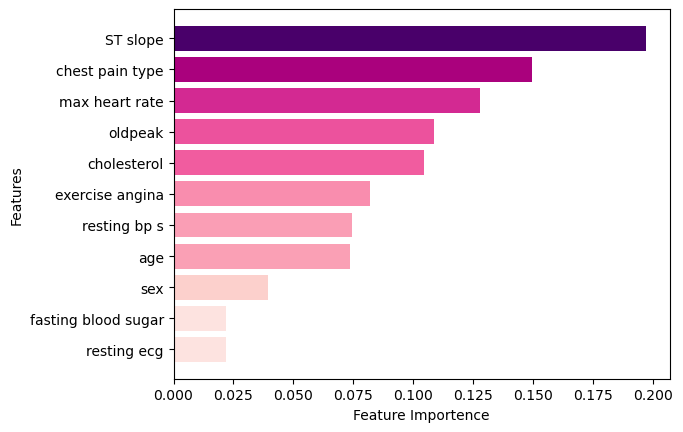

In [19]:
import numpy as np

feature_importances = Tunedforest.feature_importances_
features = Tunedforest.feature_names_in_

sorted_features = features[np.argsort(feature_importances)]
sorted_importances = feature_importances[np.argsort(feature_importances)]

colrs = plt.cm.RdPu( sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color= colrs)
plt.xlabel('Feature Importence')
plt.ylabel('Features')
plt.show()

<Axes: >

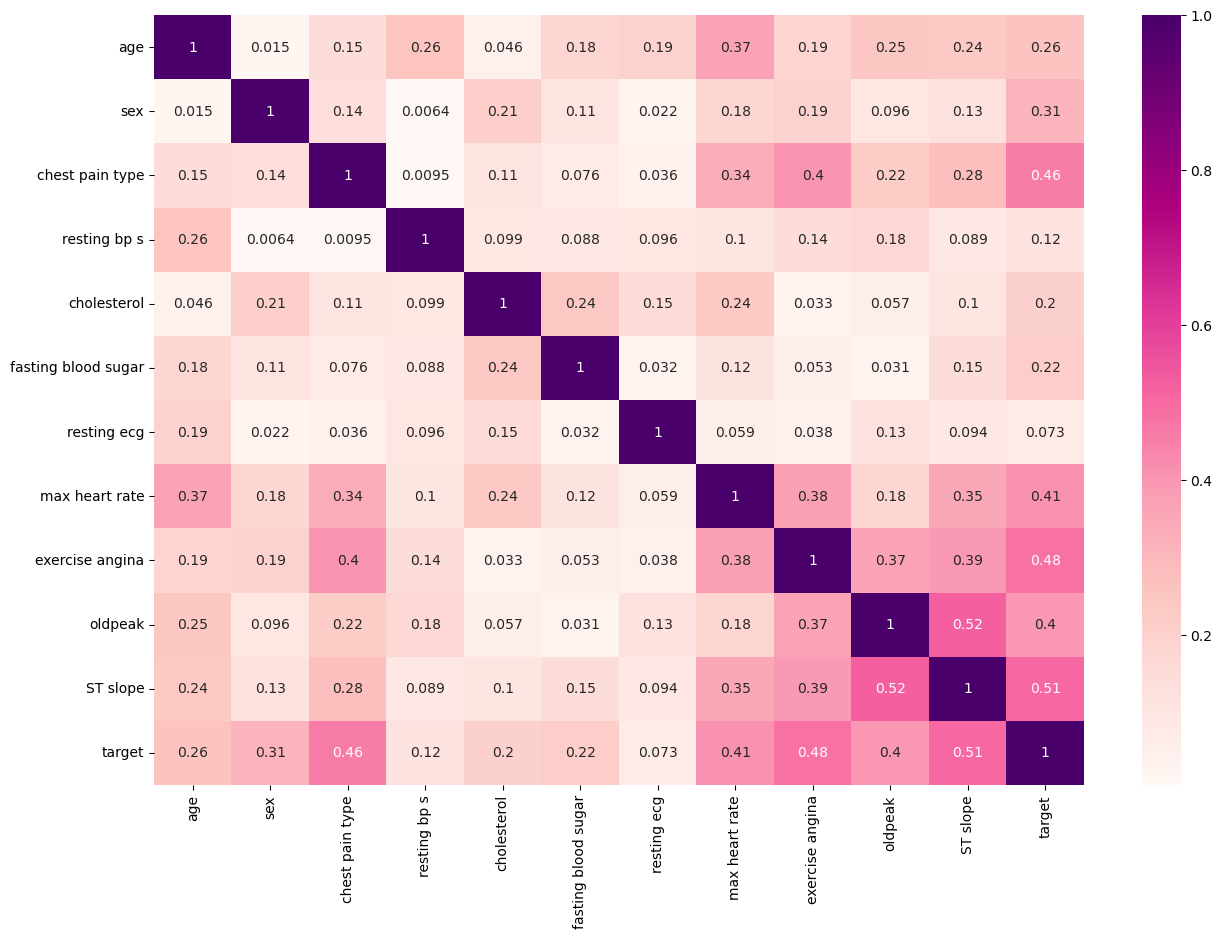

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), annot = True, cmap ='RdPu')

In [ ]:
import pickle
pickle.dump(forest_classifier, open("heart_model.pkl", "wb"))